# Ad Insight Analysis

I was brought on for a three-week internship at a local marketing company. The company delivers animated explainer videos to gain traction for their clients in the form of leads.

I was asked to work with their Facebook Ad Platform to interpret the performance of their video advertisements. Facebook's Business Manager Platform provides up to 30+ metrics to provide Ad Insights. Currenlty the business had not performed any advanced use of the insight data to optimize ad performance.

This company asked me identify which should be optimized in their ad delivery to secure leads.

## Problem/Aim:
Identify what how to optimize ads to generate results.

## Question:
1) Which predictor varibables map onto results?<br>

## Hypothesis:
1) Predictors that require an action (e.g., clicks, shares, etc.) on the ad will map with incrased leads.<br>

## The Data and Analysis:
The analysis was restricted to ad data specifically requiring the call to action to fill a lead form. This lead to a relatively small dataset that comprised of 30 observations and 25 selected predictors.

To solve this I used a **supervised machine learning approach**. I chose to create a linear signature based on the multiple predictor variables that map onto Leads.

### Import the data from Facebook. 

In [9]:
import requests
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
import seaborn as sns; sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline

token = {USER_TOKEN} 
x = 'https://graph.facebook.com/v2.10/{BUSINESS_ID}/campaigns?fields=name,status,insights{reach,impressions,clicks}&access_token='+token
datatext = requests.get(x)
print(data.text)
data = pd.read_json(x)

,Reporting Starts,Reporting Ends,Delivery,Results,Ad Duration,Reach,Cost per Results,Amount Spent (CAD),Relevance Score,Link Clicks,...,CTR (All),3-Second Video Views,10-Second Video Views,30-Second Video Views,Video Watches at 25%,Video Watches at 50%,Video Watches at 75%,Video Watches at 100%,Video Average Watch Time,Video Percentage Watched
0,2017-08-28,2017-10-13,not_delivering,14,46,5559,12.150714,170.11,7.0,65,...,2.492582,1314,489,144,497,259,155,90,00:00:03,8.59
1,2017-08-08,2017-10-13,not_delivering,20,66,10705,25.847000,516.94,7.0,154,...,2.893658,3058,1169,439,431,209,127,56,00:00:04,3.35
2,2017-06-07,2017-10-13,not_delivering,20,128,6879,8.867500,177.35,7.0,80,...,3.645728,1260,559,209,210,90,57,31,00:00:03,3.26
3,2017-06-07,2017-10-13,inactive,119,128,17615,4.866975,579.17,9.0,347,...,4.067415,4973,2243,863,849,384,215,111,00:00:04,3.28
4,2017-05-08,2017-10-13,not_delivering,21,158,6636,8.288095,174.05,8.0,61,...,3.227384,1627,625,180,177,85,45,20,00:00:07,6.02


### Assign data to variables for analysis.

In [10]:
# set outcome and predictor variables 
outcome = data["Results"]
ad_dur = data["Ad Duration"]
reach = data["Reach"]
cpr = data["Cost per Results"]
relevance = data["Relevance Score"]
link_clicks = data["Link Clicks"]
imp = data["Impressions"]
soc_imp = data["Social Impressions"]
soc_reach = data["Social Reach"]
freq = data["Frequency"]
actions = data["Actions"]
clicks = data["Clicks (All)"]
cpc = data["CPC (All) (CAD)"]
ctr = data["CTR (All)"]
total_three_sec = data["3-Second Video Views"]
total_ten_sec = data["10-Second Video Views"]
total_thirty_sec = data["30-Second Video Views"]
twentyfive_perc = data["Video Watches at 25%"]
fifty_perc = data["Video Watches at 50%"]
seventyfive_perc = data["Video Watches at 75%"]
onehundred_perc = data["Video Watches at 100%"]
avg_watch_sec = data["Video Average Watch Time"]
avg_watch_perc = data["Video Percentage Watched"]

data = pd.concat([outcome, ad_dur, reach, cpr, relevance, link_clicks, imp, soc_imp, soc_reach, freq, actions, clicks, cpc, ctr, total_three_sec, total_ten_sec, total_thirty_sec, twentyfive_perc, fifty_perc, seventyfive_perc, onehundred_perc, avg_watch_perc], axis=1)
train_set, test_set = train_test_split(data, test_size = 0.20, train_size = 0.80)
outcome_train = train_set["Results"]
outcome_test = test_set["Results"]

### Check Assumption of Linear regression are not violated.
#### 1) Linearity - backward selection by plotting all predictors to reduce data set. 
> Criterion is rsquare < 0.64, then predictor to be removed.

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.960e+31
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          3.88e-276
Time:                        01:30:22   Log-Likelihood:                 613.05
No. Observations:                  20   AIC:                            -1222.
Df Residuals:                      18   BIC:                            -1220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.998e-15   3.42e-15     -0.876      0.3

/Applications/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1591: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     361.0
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           2.33e-13
Time:                        01:30:24   Log-Likelihood:                -59.229
No. Observations:                  20   AIC:                             122.5
Df Residuals:                      18   BIC:                             124.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5863      1.453     -1.780      

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     244.7
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           6.37e-12
Time:                        01:30:27   Log-Likelihood:                -62.894
No. Observations:                  20   AIC:                             129.8
Df Residuals:                      18   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.4512 

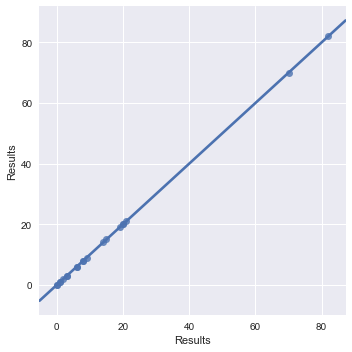

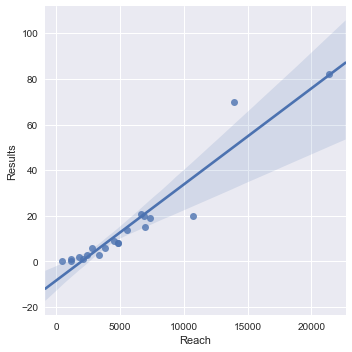

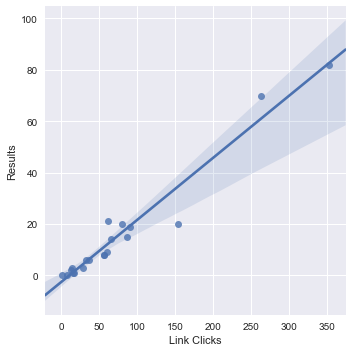

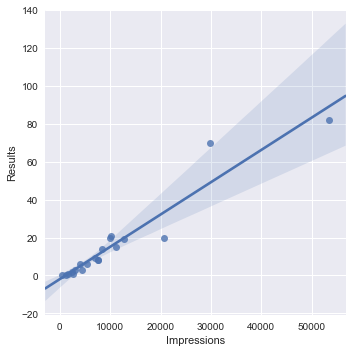

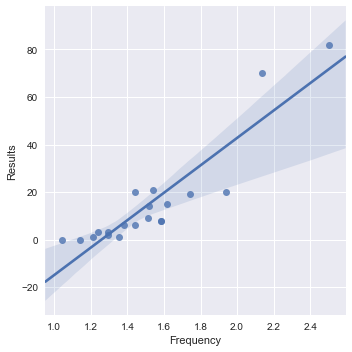

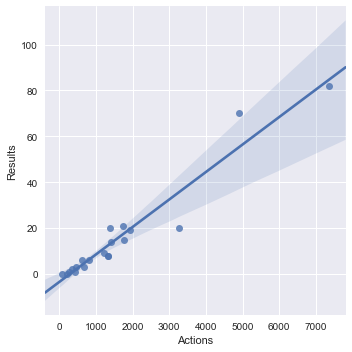

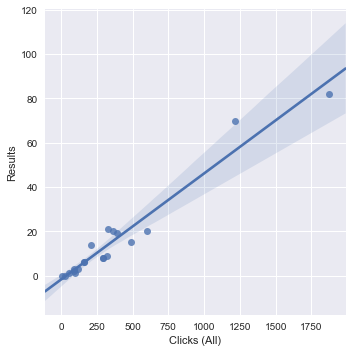

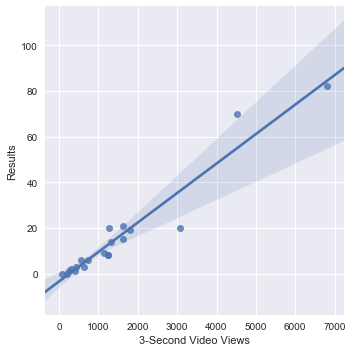

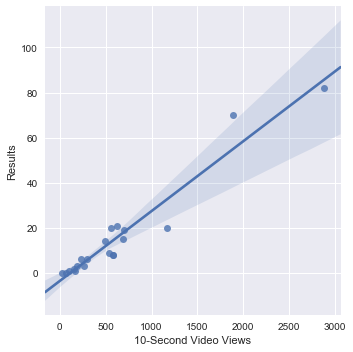

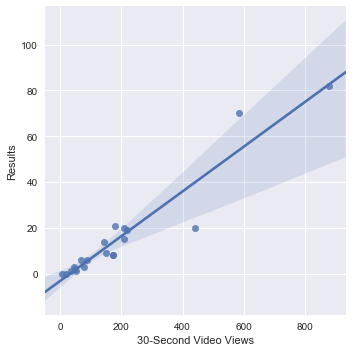

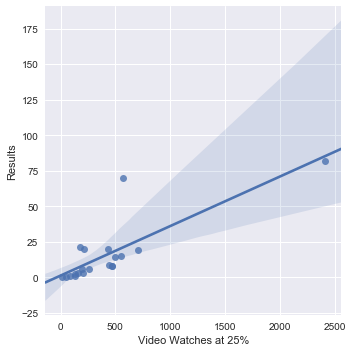

In [11]:
for column in data:
    reg = sm.OLS(outcome_train,sm.add_constant(train_set[column])).fit()
    if reg.rsquared >= 0.64: # adjust parameter based on 
        print (reg.summary())
        x = column
        reg_plot = sns.lmplot(x = x, y = "Results", data = train_set)

### Perform Multiple Regression on appropriate predictors.
> Reach <br>
> Link Clinks <br>
> Impressions <br>
> Frequency <br>
> Actions <br>
> Clicks (All) <br>
> 3-second Views <br>
> 10-s Views <br>
> 30-s Views <br>

In [12]:
data_reg = train_set[["Reach", "Link Clicks", "Impressions", "Frequency", "Actions", "Clicks (All)", "3-Second Video Views", "10-Second Video Views", "30-Second Video Views"]]
model = sm.OLS(outcome_train, sm.add_constant(data_reg)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     82.40
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           3.43e-08
Time:                        01:30:44   Log-Likelihood:                -46.504
No. Observations:                  20   AIC:                             113.0
Df Residuals:                      10   BIC:                             123.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    25.06

### Refine Multiple Regression based on p-values significance.
> Remove predictors based on p-value in descending order. <br>
> Maintain rsquare_adj > 0.90.

In [13]:
crit_rsqadj = 0.95 #tune parameter.
while model.rsquared_adj >= crit_rsqadj:
    pvaluedict = dict(model.pvalues)
    index, pvalue = max(enumerate(model.pvalues), key = lambda e: e[1]) # get the index of the highest p-value.
    variable = list(pvaluedict.keys())[list(pvaluedict.values()).index(pvalue)] # seperate key-value pairs of pvalue dict into seperate lists.
    print(variable)
    if pvalue > 0.05:
        data_reg = data_reg.drop(variable, axis = 1) # drop the variable within the dataframe # drop the variable within the dataframe
        model = sm.OLS(outcome_train, data_reg).fit() #run the model over again with new data frame
        print(model.summary())
    elif pvalue < 0.05:
        break

Reach
                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           3.09e-10
Time:                        01:30:47   Log-Likelihood:                -50.027
No. Observations:                  20   AIC:                             116.1
Df Residuals:                      12   BIC:                             124.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Link Clicks             

*** We have developed a model regression model baeed on several predictor variables ***

<div class="alert alert-block alert-warning">$$Results(y)= -2.03(Frequency) + 0.28(Actions) - 0.27(3s View) - 0.17 (30s View) + int $$</div>

### Get a model residuals and predicted values.
#### 2) Equal Spread - data is spread equally among residuals and predicted values.

Mean-Squared Error training set:  11.4449170807
Mean-Squared Error testing set:  330.674145791


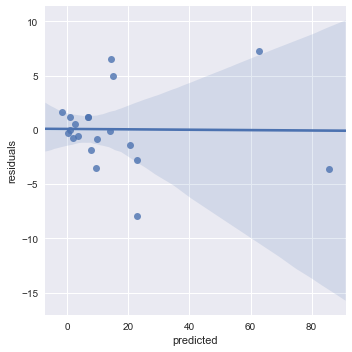

In [15]:
from sklearn.metrics import mean_squared_error
test_reg = test_set[['Frequency', 'Actions', '3-Second Video Views', '30-Second Video Views']]
residuals_train = model.resid    
predicted_train = model.predict(data_reg)
predicted_test = model.predict(test_reg)

residuals_train_df = residuals_train.to_frame(name = 'residuals')
predicted_train_df = predicted_train.to_frame(name = 'predicted')
residual_predicted_train = pd.concat([residuals_train_df, predicted_train_df], axis = 1)
resid_pred_plot = sns.lmplot(x = 'predicted', y = "residuals", data = residual_predicted_train)



MSE_train = mean_squared_error(outcome_train, predicted_train)
MSE_test = mean_squared_error(outcome_test, predicted_test)
print("Mean-Squared Error training set: ", MSE_train)
print("Mean-Squared Error testing set: ", MSE_test)

#### 3) Residual Normality - residuals show normal distribution.

                 residuals
count                   20
mean             0.0515337
std                3.47052
min               -7.93274
25%               -1.48558
50%              -0.177432
75%                1.20578
max                7.22274
skewness  [0.173246473388]
W:  0.941345751285553 ; pvalue:  0.2542124390602112


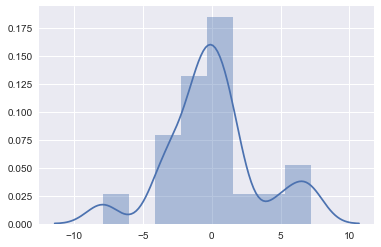

In [16]:
from scipy import stats
sns.distplot(residuals_train_df)
moments = residuals_train_df.describe()
skewness = sp.stats.skew(residuals_train_df)
moments.loc['skewness'] = [skewness]
shap = stats.shapiro(residuals_train_df)
print(moments)
print("W: ", shap[0],";", "pvalue: ", shap[1])

## Final Conclusions

The above is an example of a multiple regression used on facebook advertising data. The analysis could be repeated in order to identify an ideal combination of covariates. Based on the r-square adjusted the models accraucy is high. <br>

***_Predictions:_***<br>
The preidctions made on the training set have show decent accuracy for under 20 leads. However due to the amount of the number of observations there is a lack of prediction with larger leads.  

***_Future Developments:_***<br>
As the company aims to increase "results" identified in my regression analysis, the results can be modified with additional samples. I suggest the company gear ads towards improvement of frequency (viewed impressions/reach) and also ads that involve an explicitly call for action (e.g., share, like, etc.). ***Lastly, it would be ideal for the company to implement a split test in order to refine ad delivery which optimizes frequency and actions.***